# CAS KAGGLE

Dataset escogido para el entrenamiento: [Top Spotify Songs 2010-2019](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)  
Pertenece a la sección 'Datasets revisats'. Dificultad: 3, Versatilidad: 2  
Problema de clasificación  

El objetivo de este notebook será clasificar una canción en un año concreto de esa década. Por lo que canciones que no estén registradas o que no se sepa cuándo fueron lanzadas dentro de ese marco de tiempo, puedan clasificarse.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

Primero, cargamos el dataset y vemos los atributos que tiene dando una breve descripción de cada uno.

In [27]:
df = pd.read_csv('top10s.csv', encoding='ISO-8859-1')
df

Unnamed: 0                                              title  \
0             1                                   Hey, Soul Sister   
1             2                               Love The Way You Lie   
2             3                                            TiK ToK   
3             4                                        Bad Romance   
4             5                               Just the Way You Are   
..          ...                                                ...   
598         599                Find U Again (feat. Camila Cabello)   
599         600      Cross Me (feat. Chance the Rapper & PnB Rock)   
600         601  No Brainer (feat. Justin Bieber, Chance the Ra...   
601         602    Nothing Breaks Like a Heart (feat. Miley Cyrus)   
602         603                                   Kills You Slowly   

               artist        top genre  year  bpm  nrgy  dnce  dB  live  val  \
0               Train       neo mellow  2010   97    89    67  -4     8   80   
1              Eminem  detroit hip hop  2010   87    93    75  -5    52   64   
2               Kesha        dance pop  2010  120    84    76  -3    29   71   
3           Lady Gaga        dance pop  2010  119    92    70  -4     8   71   
4          Bruno Mars              pop  2010  109    84    64  -5     9   43   
..                ...              ...   ...  ...   ...   ...  ..   ...  ...   
598       Mark Ronson        dance pop  2019  104    66    61  -7    20   16   
599        Ed Sheeran              pop  2019   95    79    75  -6     7   61   
600         DJ Khaled        dance pop  2019  136    76    53  -5     9   65   
601       Mark Ronson        dance pop  2019  114    79    60  -6    42   24   
602  The Chainsmokers       electropop  2019  150    44    70  -9    13   23   

     dur  acous  spch  pop  
0    217     19     4   83  
1    263     24    23   82  
2    200     10    14   80  
3    295      0     4   79  
4    221      2     4   78  
..   ...    ...   ...  ...  
598  176      1     3   75  
599  206     21    12   75  
600  260      7    34   70  
601  217      1     7   69  
602  213      6     6   67  

[603 rows x 15 columns]

In [28]:
print(df.dtypes)

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object


Las siguientes descripciones de los atributos se han obtenido de la página original de la que provienen los datos: [Organize Your Music](http://organizeyourmusic.playlistmachinery.com/)
* Unnamed(Entero): Atributo que no tiene nombre, pero que en su descripción en Kaggle se indica que es la ID de la fila. Por lo tanto, este atributo se puede eliminar al no guardar ningún tipo de información importante
* title(Categórico): Título de la canción
* artist(Categórico): Autor de la canción
* top genre(Categórico): Género de la canción
* year(Entero): Año en el que se lanzó la canción. Según la página de la que provienen los datos, el lanzamiento de una canción puede no ser el esperado debido a temas de lanzamiento, relanzamiento, etc.
* bpm(Entero): Tempo de la canción
* nrgy(Entero): Nivel de energía de la canción
* dnce(Entero): Nivel de facilidad a la hora de bailar la canción
* dB(Entero): Volumen de la canción
* live(Entero): Probabilidad de que haya sido grabada en vivo
* val(Entero): Nivel de positivismo en la canción
* dur(Entero): Duración de la canción
* acous(Entero): Nivel de acústica de la canción
* spch(Entero): Cantidad de palabras que contiene
* pop(Entero): Popularidad de la cancion

Para saber la escala en la que se mueven los atributos que indican un nivel arbitrario de conceptos como lo fácil que es bailar la canción, vamos a ver el máximo y mínimo de cada columna

In [29]:
df.describe()

Unnamed: 0         year         bpm        nrgy        dnce  \
count  603.000000   603.000000  603.000000  603.000000  603.000000   
mean   302.000000  2014.592040  118.545605   70.504146   64.379768   
std    174.215384     2.607057   24.795358   16.310664   13.378718   
min      1.000000  2010.000000    0.000000    0.000000    0.000000   
25%    151.500000  2013.000000  100.000000   61.000000   57.000000   
50%    302.000000  2015.000000  120.000000   74.000000   66.000000   
75%    452.500000  2017.000000  129.000000   82.000000   73.000000   
max    603.000000  2019.000000  206.000000   98.000000   97.000000   

               dB        live         val         dur       acous        spch  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean    -5.578773   17.774461   52.225539  224.674959   14.326700    8.358209   
std      2.798020   13.102543   22.513020   34.130059   20.766165    7.483162   
min    -60.000000    0.000000    0.000000  134.000000    0.000000    0.000000   
25%     -6.000000    9.000000   35.000000  202.000000    2.000000    4.000000   
50%     -5.000000   12.000000   52.000000  221.000000    6.000000    5.000000   
75%     -4.000000   24.000000   69.000000  239.500000   17.000000    9.000000   
max     -2.000000   74.000000   98.000000  424.000000   99.000000   48.000000   

              pop  
count  603.000000  
mean    66.520730  
std     14.517746  
min      0.000000  
25%     60.000000  
50%     69.000000  
75%     76.000000  
max     99.000000

Por lo que se ve, los atributos nrgy, dnce, live, val, dur, acous, spch y pop parecen estar en una escala de 0 al 100, ya que el mínimo nunca baja de 0 y el máximo que hay es de 99 en alguno de ellos.

In [30]:
target_categories = df['year'].unique()
print('Número de categorías en el target: ', target_categories.shape[0])
print('Listado de categorías: ', target_categories)

Número de categorías en el target:  10
Listado de categorías:  [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


El target tiene 10 categorías diferentes, por lo que se trata de un problema de clasificación multiclase. Estas categorías van desde 2010 hasta 2019.

In [31]:
df_num = df.drop(columns=['title', 'artist', 'top genre'])
correlation_matrix = df_num.corr()

correlation_with_target = correlation_matrix['year'].sort_values(ascending=False)

print('Correlación con year:')
print(correlation_with_target)

Correlación con year:
year          1.000000
Unnamed: 0    0.989031
pop           0.241261
acous         0.101725
dnce          0.079269
spch          0.004778
bpm          -0.104247
val          -0.122025
dB           -0.126471
live         -0.136331
dur          -0.215344
nrgy         -0.225596
Name: year, dtype: float64


De los atributos numéricos, el que parece estar más relacionado con el año es la popularidad, y de los que están inversamente relacionados son la energía y la duración.  
En cuanto a los que parecen tener muy poca relación con el target, están el speech seguido de dance.  
Aunque el atributo Unnamed: 0 aparezca como muy relevante, es un identificador y utilizarlo sería como hace trampas a la hora de clasificar ya que, seguramente, los datos se han ido recopilando en orden a lo largo de los años y por lo tanto las canciones de cada año estarán en un intervalo de identificadores seguidos concreto.  
Dicho lo cual, title y artist también son identificadores para cada canción. Sin embargo, artist puede dar información por el período de actividad del artista, y title puede dar información por el lenguaje utilizado que puede depender de la época y el contexto. Aun así, esto son características arbitrarias y no tienen por qué coincidir en canciones futuras, por lo que se podrían considerar como ruido a la hora de entrenar el modelo y además dificultarían la clasificación al tener que mezclarlo con bag of words para poder sacarles algo de información, por lo que se eliminarán de la clasificación.

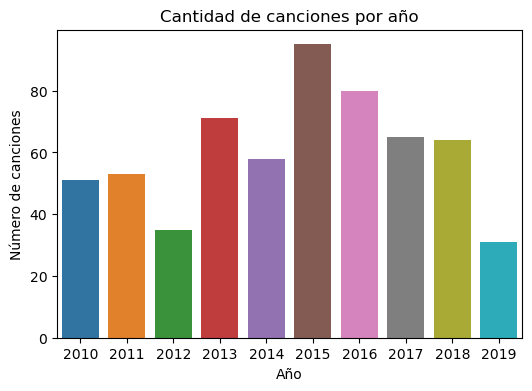

Número de canciones 2015:  95
Número de canciones 2019:  31
year
2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: count, dtype: int64


In [32]:

survival_counts = df['year'].value_counts()

# Gráfico de barras para visualizar la distribución de sobrevivientes
plt.figure(figsize=(6, 4))
sns.countplot(x='year', data=df)
plt.xlabel('Año')
plt.ylabel('Número de canciones')
plt.title('Cantidad de canciones por año')
plt.show()

print('Número de canciones 2015: ', len(df['year'][df['year'] == 2015]))
print('Número de canciones 2019: ', len(df['year'][df['year'] == 2019]))
print(survival_counts)
# # Porcentaje de pasajeros que sobrevivieron
# survival_percentage = survival_counts / len(df) * 100
# print("Porcentaje de pasajeros que sobrevivieron:")
# print(survival_percentage)

Como muestra el histograma, hay un cierto desbalanceo entre algunos años. Por ejemplo, entre 2025 y 2019 hay una diferencia enorme de 64 canciones. Es por ello que hacer una partición de train y test estratificada será importante en este entrenamiento, al igual que utilizar un cross validation con folds igualmente estratificados.

Veamos ahora unas nubes de punto para representar los datos y ver si hay algún valor extraño.

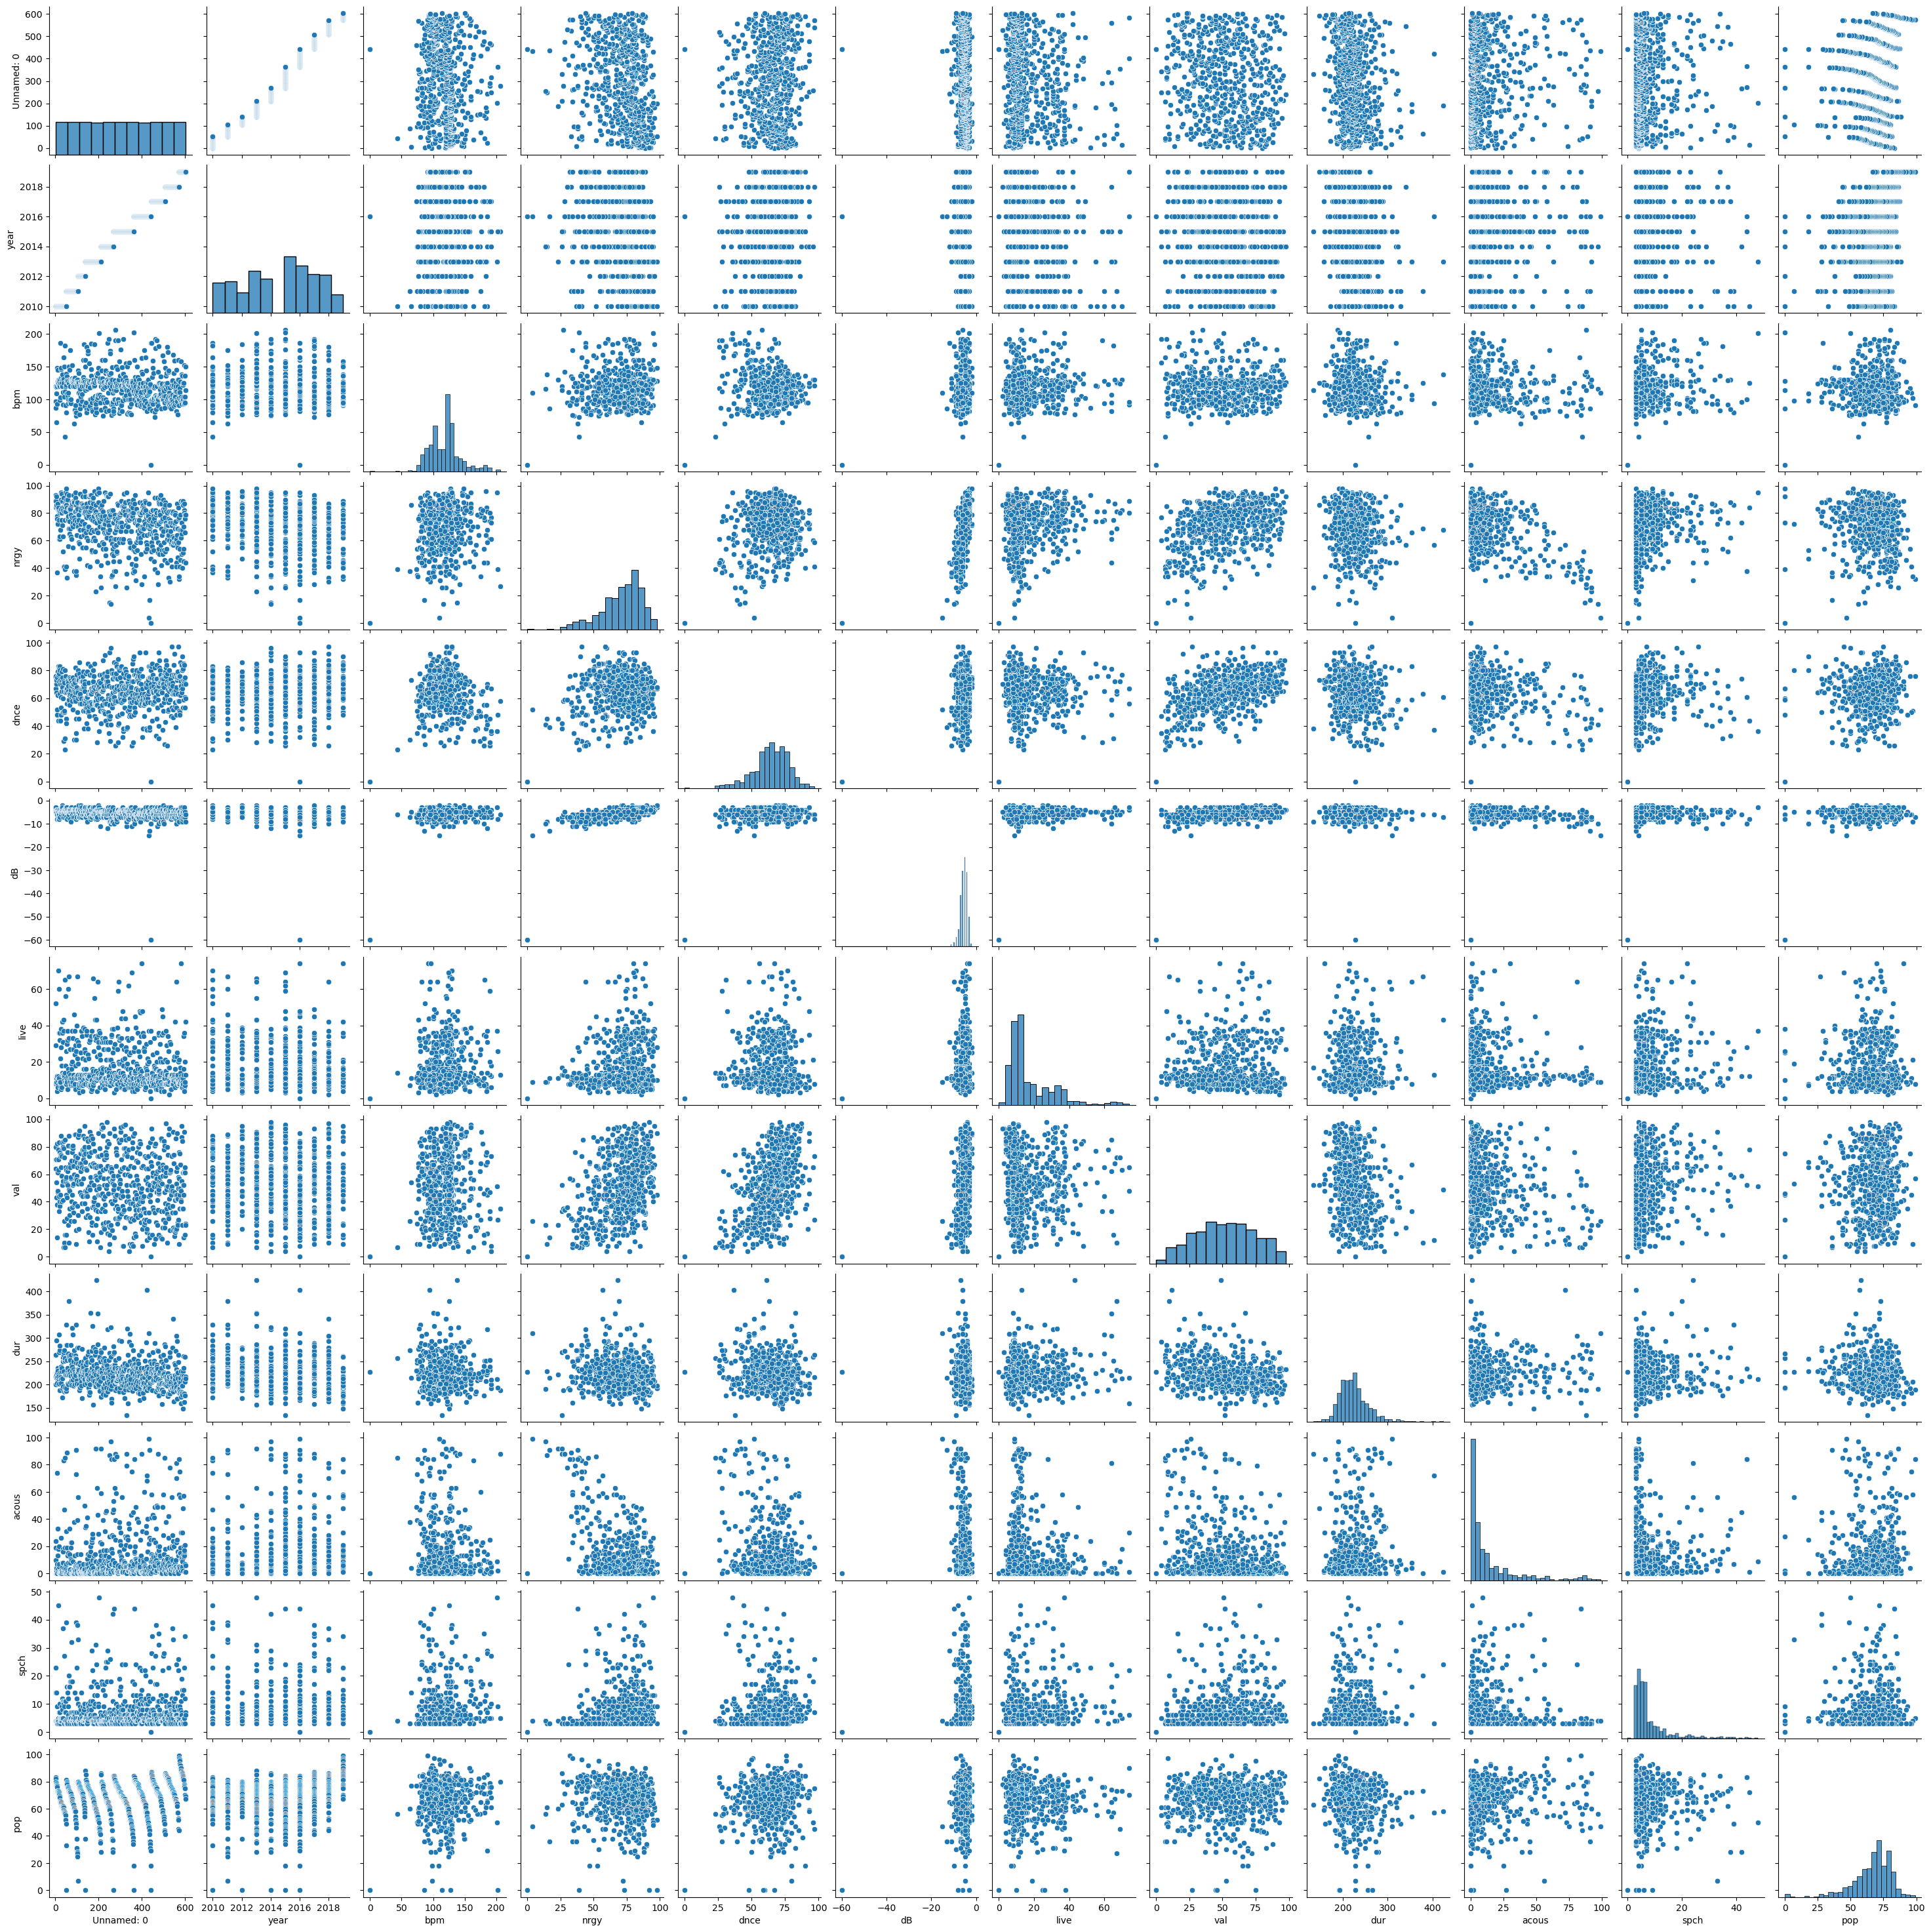

In [33]:
sns.pairplot(df)

Parece que hay una canción de 2016 con un nivel de decibelios de -60, lo cual parece ser un valor anómalo respecto a los otros. 

In [34]:
print(df['title'][df['dB'] == -60])
print(df['artist'][df['dB'] == -60])

442    Million Years Ago
Name: title, dtype: object
442    Adele
Name: artist, dtype: object


No sé exactamente cómo se ha medido el nivel de decibelios de cada canción y al escucharla no parece tener un volumen muy distinto al de las otras. Por lo que se podría eliminar la fila de esa canción para ver cómo cambia el pairplot. Además eliminamos el Unnamed al ser innecesario.

In [35]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


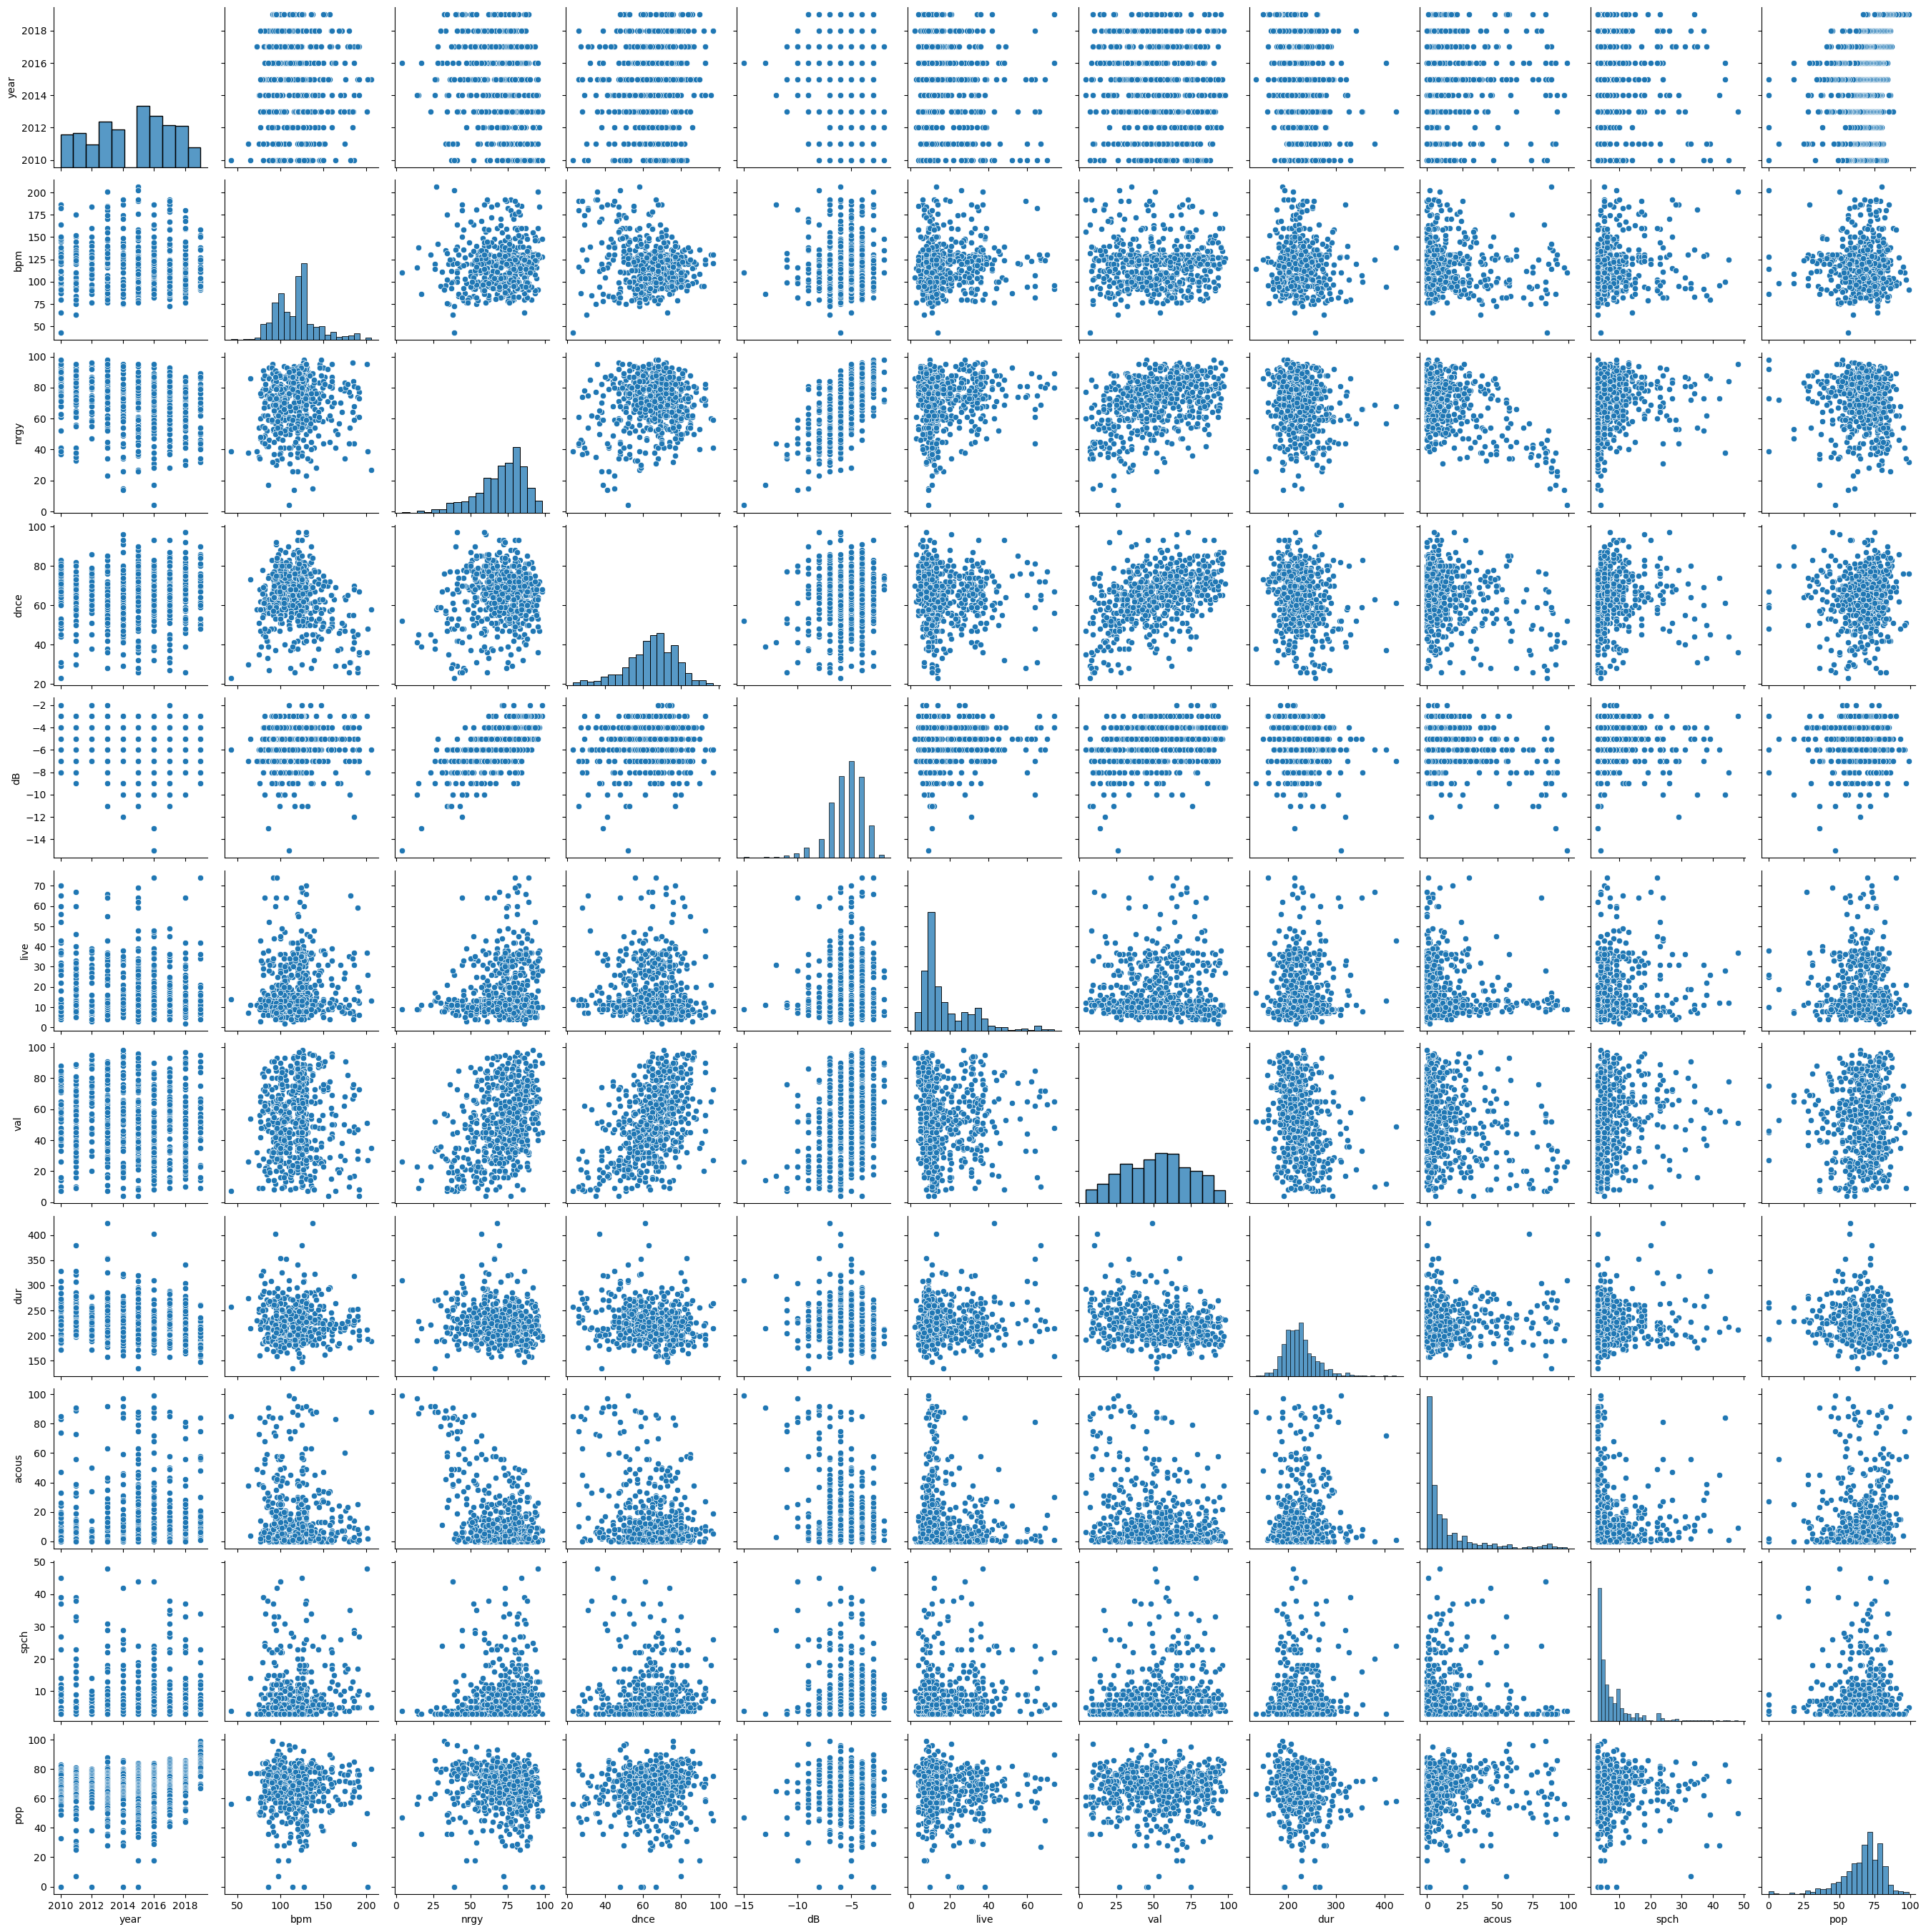

In [36]:
df_custom = df[df['dB'] != -60]
df_custom = df_custom.drop(columns=[df_custom.columns[0]])
print(df_custom.columns)
sns.pairplot(df_custom)

Parece que ya está todo mejor, aunque no parece verse ninguna relación a simple vista. Es cierto que quedan más puntos que van sueltos, pero la diferencia no parece ser tan grande como para tener que eliminar las filas de dichos puntos.

Un detalle que llama la atención en la discretización que hay en los decibelios.

Como no hay ningún atributo categórico de pocas opciones, un boxplot de cualquier columna resultaría en un gráfico incomprensible.

Comprobamos si existen NANs en este dataset, para ver si es necesario hacer algún tipo de preprocesamiento de datos más adelante.

In [37]:
print(df.isna().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


No hay ningún NAN.

## PREPROCESSING

Los datos de este dataset están bastante bien organizados, pero aun así vamos a eliminar las columnas identificadoras y la fila correspondiente a la canción de -60dB.

In [38]:
df = pd.read_csv('top10s.csv', encoding='ISO-8859-1')
df = df.drop(columns=[df.columns[0], 'title', 'artist'])
print(df.columns)
df = df[df['dB'] != -60]
df.describe()

Index(['top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop'],
      dtype='object')


year         bpm        nrgy        dnce          dB  \
count   602.000000  602.000000  602.000000  602.000000  602.000000   
mean   2014.589701  118.742525   70.621262   64.486711   -5.488372   
std       2.608592   24.339497   16.068471   13.129357    1.704657   
min    2010.000000   43.000000    4.000000   23.000000  -15.000000   
25%    2013.000000  100.000000   61.000000   57.000000   -6.000000   
50%    2015.000000  120.000000   74.000000   66.000000   -5.000000   
75%    2017.000000  129.000000   82.000000   73.000000   -4.000000   
max    2019.000000  206.000000   98.000000   97.000000   -2.000000   

             live         val         dur       acous        spch         pop  
count  602.000000  602.000000  602.000000  602.000000  602.000000  602.000000  
mean    17.803987   52.312292  224.671096   14.350498    8.372093   66.631229  
std     13.093347   22.430640   34.158310   20.775203    7.481608   14.273775  
min      2.000000    4.000000  134.000000    0.000000    3.000000    0.000000  
25%      9.000000   35.000000  202.000000    2.000000    4.000000   60.000000  
50%     12.000000   52.000000  220.500000    6.000000    5.000000   69.000000  
75%     24.000000   69.000000  239.750000   17.000000    9.000000   76.000000  
max     74.000000   98.000000  424.000000   99.000000   48.000000   99.000000

Una vez hecho eso, miremos si están normalizados.

In [39]:
df.head(n=10)

top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0       neo mellow  2010   97    89    67  -4     8   80  217     19     4   
1  detroit hip hop  2010   87    93    75  -5    52   64  263     24    23   
2        dance pop  2010  120    84    76  -3    29   71  200     10    14   
3        dance pop  2010  119    92    70  -4     8   71  295      0     4   
4              pop  2010  109    84    64  -5     9   43  221      2     4   
5     canadian pop  2010   65    86    73  -5    11   54  214      4    14   
6        dance pop  2010  120    78    75  -4     4   82  203      0     9   
7        dance pop  2010  148    76    52  -6    12   38  225      7     4   
8          hip pop  2010   93    37    48  -8    12   14  216     74     3   
9    barbadian pop  2010  126    72    79  -4     7   61  235     13     4   

   pop  
0   83  
1   82  
2   80  
3   79  
4   78  
5   77  
6   77  
7   77  
8   76  
9   73

Los datos no están normalizados ya que algunos atributos están en lo que parece una escala de 0 a 100 y otros, como los dB llegan hasta los números negativos.  
Podríamos aplicar una normalización Z-score (StandardScaler), ya que hemos eliminado los valores que parecen atípicos (la canción de -60 dB).

Para los datos categóricos del dataset, que es top genre, se debería aplicar una codificación para pasarlos a atributos numéricos, sin embargo la cantidad de valores únicos que tiene son demasiados como para crear una columna para cada valor único con one-hot encoding.

In [40]:
print('Cantidad de valores únicos de top genre: ', df['top genre'].nunique())

Cantidad de valores únicos de top genre:  50


Por lo tanto se utilizará mean encoding. Aunque pueda generar overfitting, como el target es un atributo categórico con un concepto de distancia temporal, puede servir para afinar mejor el entrenamiento. Más adelante se utilizará cross-validation y se mirará de atenuar el overfitting que esto pueda conllevar.

In [41]:
! pip install category_encoders

In [42]:
from category_encoders.target_encoder import TargetEncoder

oe = TargetEncoder()
df = oe.fit_transform(df, df['year'])
df.head(10)

top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
0  2014.442429  2010   97    89    67  -4     8   80  217     19     4   83
1  2014.506051  2010   87    93    75  -5    52   64  263     24    23   82
2  2014.348624  2010  120    84    76  -3    29   71  200     10    14   80
3  2014.348624  2010  119    92    70  -4     8   71  295      0     4   79
4  2015.041721  2010  109    84    64  -5     9   43  221      2     4   78
5  2015.154773  2010   65    86    73  -5    11   54  214      4    14   77
6  2014.348624  2010  120    78    75  -4     4   82  203      0     9   77
7  2014.348624  2010  148    76    52  -6    12   38  225      7     4   77
8  2014.077416  2010   93    37    48  -8    12   14  216     74     3   76
9  2013.939185  2010  126    72    79  -4     7   61  235     13     4   73

Ahora, aplicamos la normalización mencionada anteriormente.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_names = [col for col in df.columns if col != 'year']
df[col_names] = scaler.fit_transform(df[col_names])
df.head(10)

top genre  year       bpm      nrgy      dnce        dB      live  \
0  -0.289803  2010 -0.894045  1.144728  0.191584  0.873847 -0.749399   
1  -0.105885  2010 -1.305241  1.393869  0.801413  0.286731  2.613881   
2  -0.560973  2010  0.051707  0.833300  0.877641  1.460964  0.855803   
3  -0.560973  2010  0.010587  1.331584  0.420270  0.873847 -0.749399   
4   1.442618  2010 -0.400609  0.833300 -0.037101  0.286731 -0.672961   
5   1.769425  2010 -2.209874  0.957871  0.648956  0.286731 -0.520084   
6  -0.560973  2010  0.051707  0.459588  0.801413  0.873847 -1.055152   
7  -0.560973  2010  1.203057  0.335017 -0.951844 -0.300385 -0.443646   
8  -1.344974  2010 -1.058524 -2.094115 -1.256758 -1.474617 -0.443646   
9  -1.744569  2010  0.298425  0.085875  1.106327  0.873847 -0.825837   

        val       dur     acous      spch       pop  
0  1.235396 -0.224762  0.223987 -0.584865  1.147726  
1  0.521493  1.123029  0.464858  1.956808  1.077609  
2  0.833826 -0.722858 -0.209582  0.752858  0.937376  
3  0.833826  2.060623 -0.691326 -0.584865  0.867259  
4 -0.415505 -0.107562 -0.594977 -0.584865  0.797142  
5  0.075304 -0.312661 -0.498628  0.752858  0.727025  
6  1.324634 -0.634959 -0.691326  0.083997  0.727025  
7 -0.638599  0.009637 -0.354105 -0.584865  0.727025  
8 -1.709454 -0.254061  2.873575 -0.718637  0.656908  
9  0.387636  0.302635 -0.065059 -0.584865  0.446558

No hay una gran cantidad de atributos y tampoco hay muchas filas del dataset como para ir añadiendo más columnas extraídas a partir de otras. Veamos ahora la matriz de correlación otra vez con todos los atributos finales.

Correlación con year:
year         1.000000
top genre    0.333405
pop          0.249841
acous        0.102411
dnce         0.085272
spch         0.005789
bpm         -0.101932
val         -0.120510
live        -0.135352
dB          -0.179094
dur         -0.215458
nrgy        -0.225296
Name: year, dtype: float64


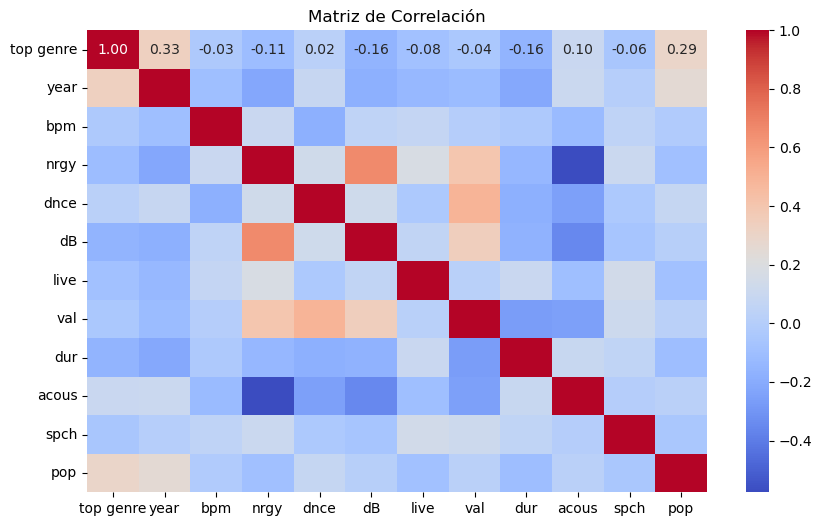

In [44]:
correlation_matrix = df.corr()
print('Correlación con year:')
print(correlation_matrix['year'].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Top genre es ahora el elemento que más relación guarda con year, lo cual tiene sentido al haber utilizado mean encoding.

## METRIC SELECTION

Para este dataset desbalanceado y el objetivo que se está planteando de clasificación multiclase, descartamos el Accuracy como métrica a tener en cuenta, ya que puede ser engañosa por el desbalanceo y por la naturaleza de la clasificación multiclase, que reducirá su valor. En cuanto a la Precision y el Recall, en este caso concreto ninguna es más relevante que la otra, pues no es más importante predecir bien todas las posibles que la mayoría de predicciones sean correctas, por lo que utilizaremos la f1-score.

En cuanto a las curvas de precision-recall y la roc-curve, por la elección realizada es más importante la precision-recall curve. Sin embargo, a continuación mostramos ambas con un modelo simple de regresión logística multiclase ovr (one vs rest) con la ayuda de OneVsRestClassifier de SKlearn.

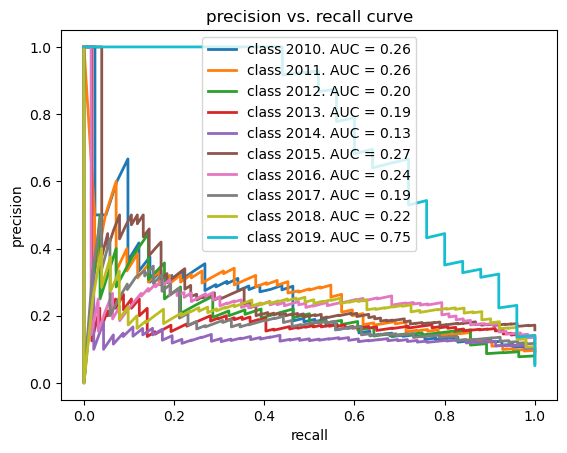

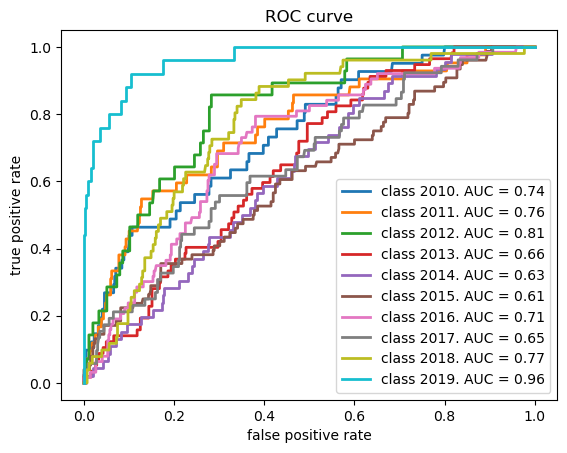

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
#%matplotlib inline

X = df.drop(columns=['year'])
y = df['year']

n_classes = y.nunique()

Y = label_binarize(y, classes=[*y.unique()])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=y)

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_train)

#Precision Recall Curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train[:, i], y_score[:, i])
    auc_prc = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i+2010}. AUC = {auc_prc:.2f}')

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# Roc Curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_score[:, i])
    auc_prc = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'class {i+2010}. AUC = {auc_prc:.2f}')

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

La clase que mejor ha predicho el modelo para el conjunto de train es la clase 2019. El rendimiento en las demás clases no parece muy bueno según la Precision Recall curve, pero veremos los resultados que salgan con otros modelos.  
Para ver el resultado global de las métricas, veamos el classification report generado con ese entrenamiento.

In [46]:
from sklearn.metrics import classification_report

# Realizar predicciones en los mismos datos (esto es solo para propósitos demostrativos)
y_pred = clf.predict(X_train)

# Genera el classification_report
report = classification_report(y_train, y_pred)

# Imprime el informe
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.60      0.07      0.13        42
           2       0.00      0.00      0.00        28
           3       1.00      0.02      0.03        57
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        76
           6       1.00      0.02      0.03        63
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00        51
           9       1.00      0.44      0.61        25

   micro avg       0.84      0.03      0.06       481
   macro avg       0.36      0.05      0.08       481
weighted avg       0.35      0.03      0.05       481
 samples avg       0.03      0.03      0.03       481



En este punto el f1-score es muy bajo a excepción de la clase 9, donde 0,61 no está tan mal. Sin embargo, el modelo es muy simple y no se han buscado hiperparámetros para mejorar la predicción final.

## MODEL SELECTION

En este apartado probaremos con diversos modelos y mantendremos aquel que de un mejor resultado sobre el conjunto de train utilizando validacion cruzada fijándonos en la métrica de F1-Score. Las opciones a considerar serán:
* Support Vector Machine (SVM), aunque en su forma más simple no se pueda utilizar para problemas multiclase, con estrategias ovr o ovo se puede utilizar para este caso.
* KNN en lugar de Decision Tree, también es capaz de manejar problemas de clasificación multiclase.
* Random Forest, como modelo más complejo al Decision Tree que pueda evitar el overfitting y ayudar a obtener mejores resultados.
* Gradient Boosting, como segundo modelo ensemble complejo para tener una técnica distinta al Random Forest a la hora de entrenar modelos.

Primero, miremos cuál da mejor resultado sin modificar sus hiperparámetros, para esto y las siguientes pruebas se utilizará una validación cruzada estratificada de 10 folds debido a la escasez de datos en el dataset para un problema de este tipo.

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

f1_scorer = make_scorer(f1_score, average='macro')
strat = StratifiedKFold(n_splits=10, shuffle=True)

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svmodel = SVC() # Support Vector Machine
knmodel = KNeighborsClassifier()
rfmodel = RandomForestClassifier()
gbmodel = GradientBoostingClassifier()

print("SVC mean f1-score: "+ str(cross_val_score(svmodel, X_train, y_train, cv=strat, scoring=f1_scorer).mean()))
print("KNeighborsClassifier mean f1-score: "+ str(cross_val_score(knmodel, X_train, y_train, cv=strat, scoring=f1_scorer).mean()))
print("RandomForestClassifier mean f1-score: "+ str(cross_val_score(rfmodel, X_train, y_train, cv=strat, scoring=f1_scorer).mean()))
print("GradientBoostingClassifier mean f1-score: "+ str(cross_val_score(gbmodel, X_train, y_train, cv=strat, scoring=f1_scorer).mean()))

SVC mean f1-score: 0.154779612348218
KNeighborsClassifier mean f1-score: 0.12530078744784628
RandomForestClassifier mean f1-score: 0.20216567282047157
GradientBoostingClassifier mean f1-score: 0.16780158956148322


De base todos los modelos han dado un resultado mediocre, aunque el más alto sin ninguna búsqueda de hiperparámetros ha sido el Gradient Boosting. Para tener un punto de referencia, veamos cómo es el F1-Score de un clasificador como sería DummyClassifier.

In [49]:
from sklearn.dummy import DummyClassifier

dumodel = DummyClassifier()

print("DummyClassifier mean f1-score: "+ str(cross_val_score(dumodel, X_train, y_train, cv=strat, scoring=f1_scorer).mean()))

DummyClassifier mean f1-score: 0.027274550011392118


El resultado es un poco alentador, ya que lo obtenido con los otros modelos es mucho mayor que el resultado del DummyClassifier, aunque distan de ser unos valores fiables para futuras clasificaciones. Aun así, a continuación hagamos una búsqueda de hiperparámetros utilizando GridSearch. Por si acaso de momento no se descartará ningún modelo.

In [50]:
from sklearn.model_selection import GridSearchCV
import warnings

# Crear una lista de modelos a considerar
models = [
    ("SVC", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
]

results = []

# Para desactivar un tipo específico de warning
warnings.filterwarnings("ignore")

# Realizar la selección de modelos y búsqueda de hiperparámetros
for model_name, model in models:

    # Realizar la búsqueda de hiperparámetros
    if model_name == "SVC":
        # Definir hiperparámetros a probar para Regresión Logística
        param_grid = {'C': [1, 4, 5, 6, 10], 'tol': [1.1, 1.01, 1, 0.1, 0.01, 1e-3], 'class_weight': [None, 'balanced'], 'decision_function_shape': ['ovo', 'ovr']}
        grid_search = GridSearchCV(model, param_grid, cv=strat, scoring=f1_scorer)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "KNN":
        # Definir hiperparámetros a probar para KNN
        param_grid = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance'], 'p': [0, 1, 2, 3, 4]}
        grid_search = GridSearchCV(model, param_grid, cv=strat, scoring=f1_scorer)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "Bosque Aleatorio":
        # Definir hiperparámetros a probar para Bosque Aleatorio
        param_grid = {'n_estimators': [50, 100, 150, 200],'max_depth': [8, 9, 10, None], 'class_weight': [None, 'balanced'], 'max_features': ['auto', 'sqrt', 'log2']}
        grid_search = GridSearchCV(model, param_grid, cv=strat, scoring=f1_scorer)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    elif model_name == "Gradient Boosting":
        # Definir hiperparámetros a probar para SVM
        param_grid = {'loss': ['log_loss', 'exponential'], 'learning_rate': [0.001, 0.01, 0.1],  'n_estimators': [100, 200, 500, 1000], 'criterion': ['friedman_mse', 'squared_error']}
        grid_search = GridSearchCV(model, param_grid, cv=strat, scoring=f1_scorer)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

    print(model_name+' Done')
    results.append([model_name, grid_search.best_score_, best_model.get_params(False)])
    #results.append([model_name, grid_search.best_score_, best_model])

# Para restaurar la configuración predeterminada de warnings
warnings.filterwarnings("default")

# Configura la opción de ancho de columna para que no se corte el texto
pd.set_option('display.max_colwidth', None)

# Crear un DataFrame para mostrar los resultados en una tabla
results_df = pd.DataFrame(results, columns=['Classifier', 'F1-Score (Train)', 'Mejores hiperparámetros'])

results_df

SVC Done
KNN Done
Random Forest Done
Gradient Boosting Done


Classifier  F1-Score (Train)  \
0                SVC          0.197210   
1                KNN          0.149058   
2      Random Forest          0.149058   
3  Gradient Boosting          0.187277   

                                                                                                                                                                                                                                                                                                                                                                                                                                     Mejores hiperparámetros  
0                                                                                                                                                                  {'C': 6, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 1.1, 'verbose': False}  
1                                                                                                                                                                                                                                                                                                      {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}  
2                                                                                                                                                                                                                                                                                                      {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}  
3  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

En el Grid Search se han mantenido los valores por defecto de cada hiperparámetro, sin embargo el F1-Score del Random Forest ha empeorado y se han obtenido unos hiperparámetros distintos a los de por defecto.  
Aun así, los resultados muestran que el mejor modelo es el Random Forest con los parámetros por defecto al haber obtenido un F1-Score de 0,202. En segundo lugar estaría el SVC con los hiperparámetros obtenidos con el Grid Search con un F1-Score de 0,197.  
En conclusión, el Random Forest por defecto es el modelo que se utilizará como final.

## ANÁLISIS FINAL

Ahora que ya hemos escogido Random Forest como el mejor modelo y hemos hecho una búsqueda de hiperparámetros (aunque el modelo por defecto sea el mejor), evaluamos el modelo con cross-validation y con el resultado sobre el conjunto de test utilizando F1-Score y además generaremos las curvas precision-recall de nuevo por ver si ha habido alguna diferencia respecto a las curvas anteriores.

In [53]:
# X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Crear una lista de modelos a considerar
model = RandomForestClassifier()

kfold = StratifiedKFold(n_splits=10, shuffle=True)

scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=f1_scorer)

f1_train = scores.mean()

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
f1_test = f1_score(y_test, y_pred_test, average='macro')

print(f'F1-Score (Train): {f1_train:.5f}')
print(f'F1-Score (Test): {f1_test:.5f}')

F1-Score (Train): 0.17302
F1-Score (Test): 0.20572


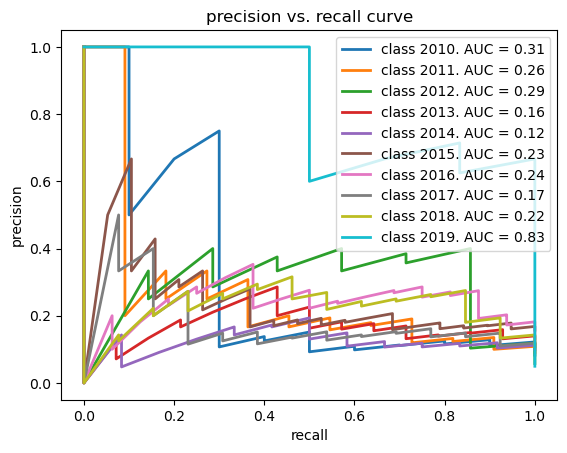

In [56]:
n_classes = y.nunique()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

#Precision Recall Curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    auc_prc = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i+2010}. AUC = {auc_prc:.2f}')

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

En cuanto a la PR curve, se puede apreciar una mejora tanto a nivel visual como en las AUC calculadas para algunas de las clases, como es el caso de la de 2010 y la de 2012.  
Por otro lado, los resultados de F1-Score obtenidos tanto en el train como en el test no presentan overfitting pero siguen siendo unos malos resultados que hacen que este modelo no pueda considerarse fiable para las predicciones planteadas en este problema.

## CONCLUSIONES

En conclusión, los resultados obtenidos no son suficien-temente buenos como para ser fiables al poner el modelo en práctica, y esto es debido a la dificultad del dataset y la propuesta de entrenamiento.  

El dataset y la idea propuesta implican una clasificación multiclase, sin embargo los datos del dataset son muy esca-sos para un problema de este estilo. Únicamente 603 filas para 10 clases distintas es una muestra muy pobre, corres-pondiendo unas 60 filas a cada clase del target si fuese balanceado. A esto se le añade que no es balanceado, y la clase con menos muestras contiene únicamente 31 datos.  
Si contamos la división entre train y test estratificada del 0,2 que se ha aplicado, esa clase se queda con unas 24 muestras. Si además se le añade el cross validation con 10 folds también estratificado, la clase se queda con 19 ejem-plos en cada entrenamiento.  
Esta cantidad no es suficientemente grande como para ser representativa, y eso se puede aplicar a las demás clases, aunque dispongan de más muestras.  
Por lo que, aunque el dataset esté limpio y no haya que aplicar mucho preprocesamiento para poder empezar a entrenar un modelo, no es suficiente para un problema de este estilo.  
Una posible solución que queda como idea para otro po-sible intento sería dividir el target en intervalos para así aumentar la probabilidad de acierto del modelo, o directa-mente plantear otro tipo de problema sobre este dataset.  